In [9]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load and Read the City and Ride Data
city_data = pd.read_csv("Data/city_data.csv")
ride_data = pd.read_csv("Data/ride_data.csv")

# Combine the data into a single dataset
pyber_data_complete = pd.merge(city_data,ride_data, how="left", on=["city"])

# Display the data table for preview
pyber_data_complete.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

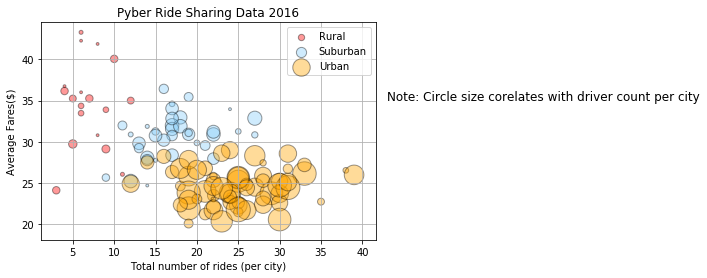

In [10]:
# Obtain the x and y coordinates for each of the three city types
color_map = {
    "Urban": "orange",
    "Suburban": "lightskyblue",
    "Rural": "red"
}
city_types = pyber_data_complete.groupby(['type']).max().index.get_level_values('type').tolist()
for type in city_types:
    
    filter_data = pyber_data_complete.loc[(pyber_data_complete['type'] == type)]
    avg_fare = round(filter_data.groupby(['city']).mean()['fare'],2)
    total_ride = filter_data.groupby(['city']).count()['ride_id']
    total_drivers = filter_data.groupby(['city']).max()['driver_count']
    
    city_areas = [8*x for x in total_drivers ]

    # Build the scatter plots for each city types
    plt.scatter(total_ride, avg_fare, s=city_areas, c=color_map[type], alpha = 0.4, edgecolors = "black", label = type )

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total number of rides (per city)")
plt.ylabel("Average Fares($)")
plt.grid()
# Create a legend
plt.legend(loc="best")

# Incorporate a text label regarding circle size
plt.text(43, 35, 'Note: Circle size corelates with driver count per city', fontsize=12)

# Save Figure
plt.savefig("../Pie_Images/Bubbleplot.png")

#Trend Observations:While there are more rides and drivers in the urban areas, 
#however the average fares are lower in urban areas as compared to rural and suburban areas. 

In [11]:
# Show plot
plt.show()

## Total Fares by City Type

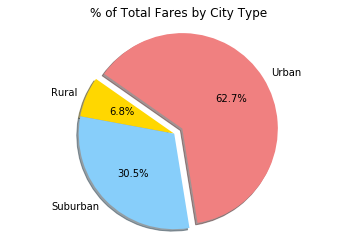

In [17]:
# Calculate Type Percents
grouped_tot_fare = round(pyber_data_complete.groupby(['type']).sum()['fare'],2)
tot_fare = round(pyber_data_complete.sum()['fare'],2)
rural_percent = round(100*(grouped_tot_fare[0]/tot_fare),2)
suburban_percent = round(100*(grouped_tot_fare[1]/tot_fare),2)
urban_percent = round(100*(grouped_tot_fare[2]/tot_fare),2)

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["gold", "lightskyblue","lightcoral"]
sizes = ([rural_percent,suburban_percent,urban_percent])
plt.pie(sizes, explode = explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Fares by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("../Pie_Images/TotalFares.png")

#Trend observations: Most of the income is generated from the urban cities areas 
#followed by the suburban areas and rural areas

In [13]:
# Show Figure
plt.show()

## Total Rides by City Type

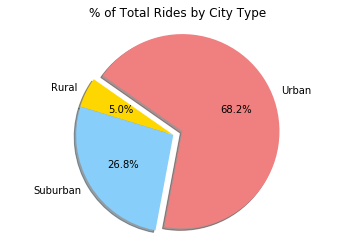

In [18]:
# Calculate Ride Percents
grouped_tot_rides = round(pyber_data_complete.groupby(['type']).sum()['ride_id'],2)
tot_rides = round(pyber_data_complete.sum()['ride_id'],2)
rural_per = round(100*grouped_tot_rides[0]/tot_rides,2)
suburban_per = round(100*grouped_tot_rides[1]/tot_rides,2)
urban_per = round(100*grouped_tot_rides[2]/tot_rides,2)

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["gold", "lightskyblue","lightcoral"]
sizes = ([rural_per,suburban_per,urban_per])
plt.pie(sizes, explode = explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Rides by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("../Pie_Images/TotalRides.png")

In [15]:
# Show Figure
plt.show()

## Total Drivers by City Type

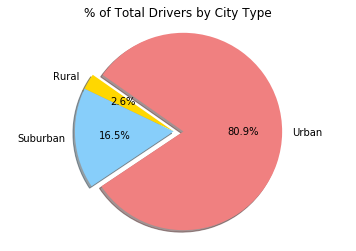

In [19]:
# Calculate Driver Percents
grouped_tot_drivers = city_data.groupby(['type']).sum()['driver_count']
tot_drivers = city_data.sum()['driver_count']
rural_drivers = round(100*grouped_tot_drivers[0]/tot_drivers,2)
suburban_drivers = round(100*grouped_tot_drivers[1]/tot_drivers,2)
urban_drivers = round(100*grouped_tot_drivers[2]/tot_drivers,2)

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
explode = (0,0,0.1)
colors = ["gold", "lightskyblue","lightcoral"]
sizes = ([rural_drivers,suburban_drivers,urban_drivers])
plt.pie(sizes, explode = explode,labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=145)
plt.title("% of Total Drivers by City Type")
plt.axis('equal')

# Save Figure
plt.savefig("../Pie_Images/TotalDrivers.png")

#Trend Observations: There are more rides and drivers available in urban areas which is directly contributing towards 
#the revenue of the pyber company. More analysis is recommended on how all the areas(rural and suburban) could contribute 
#towards the company's revenue.

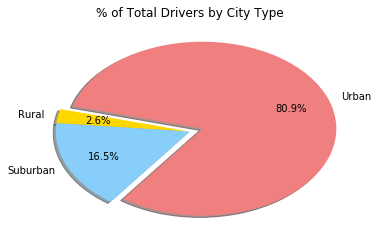

In [6]:
# Show Figure
plt.show()